In [2]:
using Plots
using LaTeXStrings
using CSV
using DataFrames
using Statistics
using JSON

In [3]:
using Pkg
Pkg.add("StatsPlots")
using StatsPlots

   Resolving package versions...
      Compat entries added for 
  No Changes to `~/eSPA.jl/Project.toml`
  No Changes to `~/eSPA.jl/Manifest.toml`
Precompiling project...
   8164.6 ms  ✓ LatinHypercubeSampling
  13310.2 ms  ✓ Clustering
  29941.2 ms  ✓ Plots → FileIOExt
  33279.6 ms  ✓ Distributions
  26730.9 ms  ✓ Plots → UnitfulExt
  39183.2 ms  ✓ MLUtils
  14459.7 ms  ✓ Distributions → DistributionsChainRulesCoreExt
  15081.7 ms  ✓ Distributions → DistributionsTestExt
  16910.0 ms  ✓ MultiKDE
  12009.9 ms  ✓ MultivariateStats
  21462.9 ms  ✓ ScientificTypes
  23014.7 ms  ✓ KernelDensity
  26437.9 ms  ✓ CategoricalDistributions
  34460.6 ms  ✓ Hyperopt
  54284.7 ms  ✓ StatisticalMeasuresBase
  68161.7 ms  ✓ MLDatasets
  77893.6 ms  ✓ StatsPlots
  77040.5 ms  ✓ MLJModels
  43719.4 ms  ✓ MLJEnsembles
  65965.1 ms  ✓ MLJBase
  29898.8 ms  ✓ MLJFlow
  30904.1 ms  ✓ MLJTuning
  32210.1 ms  ✓ MLJBalancing
  36350.1 ms  ✓ MLJIteration
 119933.8 ms  ✓ StatisticalMeasures
  10426.6 ms  ✓ MLJ

In [4]:
paths = Dict(
    "4_100" => "exp_hybrid_4_100_2025-05-27_22-51-22",
    "4_1000" => "exp_hybrid_4_1000_2025-05-27_22-51-44",
    "10_100" => "exp_hybrid_10_100_2025-05-27_22-52-00",
    "10_1000" => "exp_hybrid_10_1000_2025-05-27_22-51-53",
    "30_100" => "exp_hybrid_30_100_2025-05-27_22-52-09",
    "30_1000" => "exp_hybrid_30_1000_2025-05-27_22-52-24"
    )

Dict{String, String} with 6 entries:
  "10_100"  => "exp_hybrid_10_100_2025-05-27_22-52-00"
  "4_100"   => "exp_hybrid_4_100_2025-05-27_22-51-22"
  "30_100"  => "exp_hybrid_30_100_2025-05-27_22-52-09"
  "30_1000" => "exp_hybrid_30_1000_2025-05-27_22-52-24"
  "10_1000" => "exp_hybrid_10_1000_2025-05-27_22-51-53"
  "4_1000"  => "exp_hybrid_4_1000_2025-05-27_22-51-44"

In [5]:
function read_data(d,n,iter)
    path = "exps/" * paths["$(d)_$n"]
    
    acc = zeros(iter)
    acc_non_fuzzy = zeros(iter)
    complete_time = zeros(iter)
    fuzzy_time = zeros(iter)
    
    for i in 1:iter
        json_data = JSON.parsefile("$(path)/params_$i.json")
        acc[i] = json_data["accuracy"]
        acc_non_fuzzy[i] = json_data["accuracy_non_fuzzy"]
        complete_time[i] = json_data["complete_time"]
    
        df = CSV.read("$(path)/opt_times_fuzzy_$i.csv",DataFrame)
        total_fuzzy = sum(sum(col) for col in eachcol(df))
        fuzzy_time[i] = total_fuzzy/1e9
    end
    return acc, acc_non_fuzzy, complete_time, fuzzy_time
end

read_data (generic function with 1 method)

In [6]:
data = Dict(
    "4_100" => read_data(4,100,50),
    "4_1000" => read_data(4,1000,50),
    "10_100" => read_data(10,100,50),
    "10_1000" => read_data(10,1000,49),
    "30_100" => read_data(30,100,50),
    "30_1000" => read_data(30,1000,27)
    )


Dict{String, NTuple{4, Vector{Float64}}} with 6 entries:
  "10_100"  => ([0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65  … …
  "4_100"   => ([0.55, 0.45, 0.55, 0.55, 0.55, 0.45, 0.55, 0.55, 0.45, 0.55  … …
  "30_100"  => ([0.4, 0.4, 0.4, 0.6, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4  …  0.4, 0.4,…
  "30_1000" => ([0.505, 0.505, 0.505, 0.505, 0.495, 0.505, 0.505, 0.505, 0.505,…
  "10_1000" => ([0.535, 0.535, 0.535, 0.535, 0.535, 0.535, 0.535, 0.535, 0.535,…
  "4_1000"  => ([0.54, 0.54, 0.54, 0.46, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54  … …

In [7]:
k = ["4_100",
"4_1000",
"10_100",
"10_1000",
"30_100",
"30_1000"]

6-element Vector{String}:
 "4_100"
 "4_1000"
 "10_100"
 "10_1000"
 "30_100"
 "30_1000"

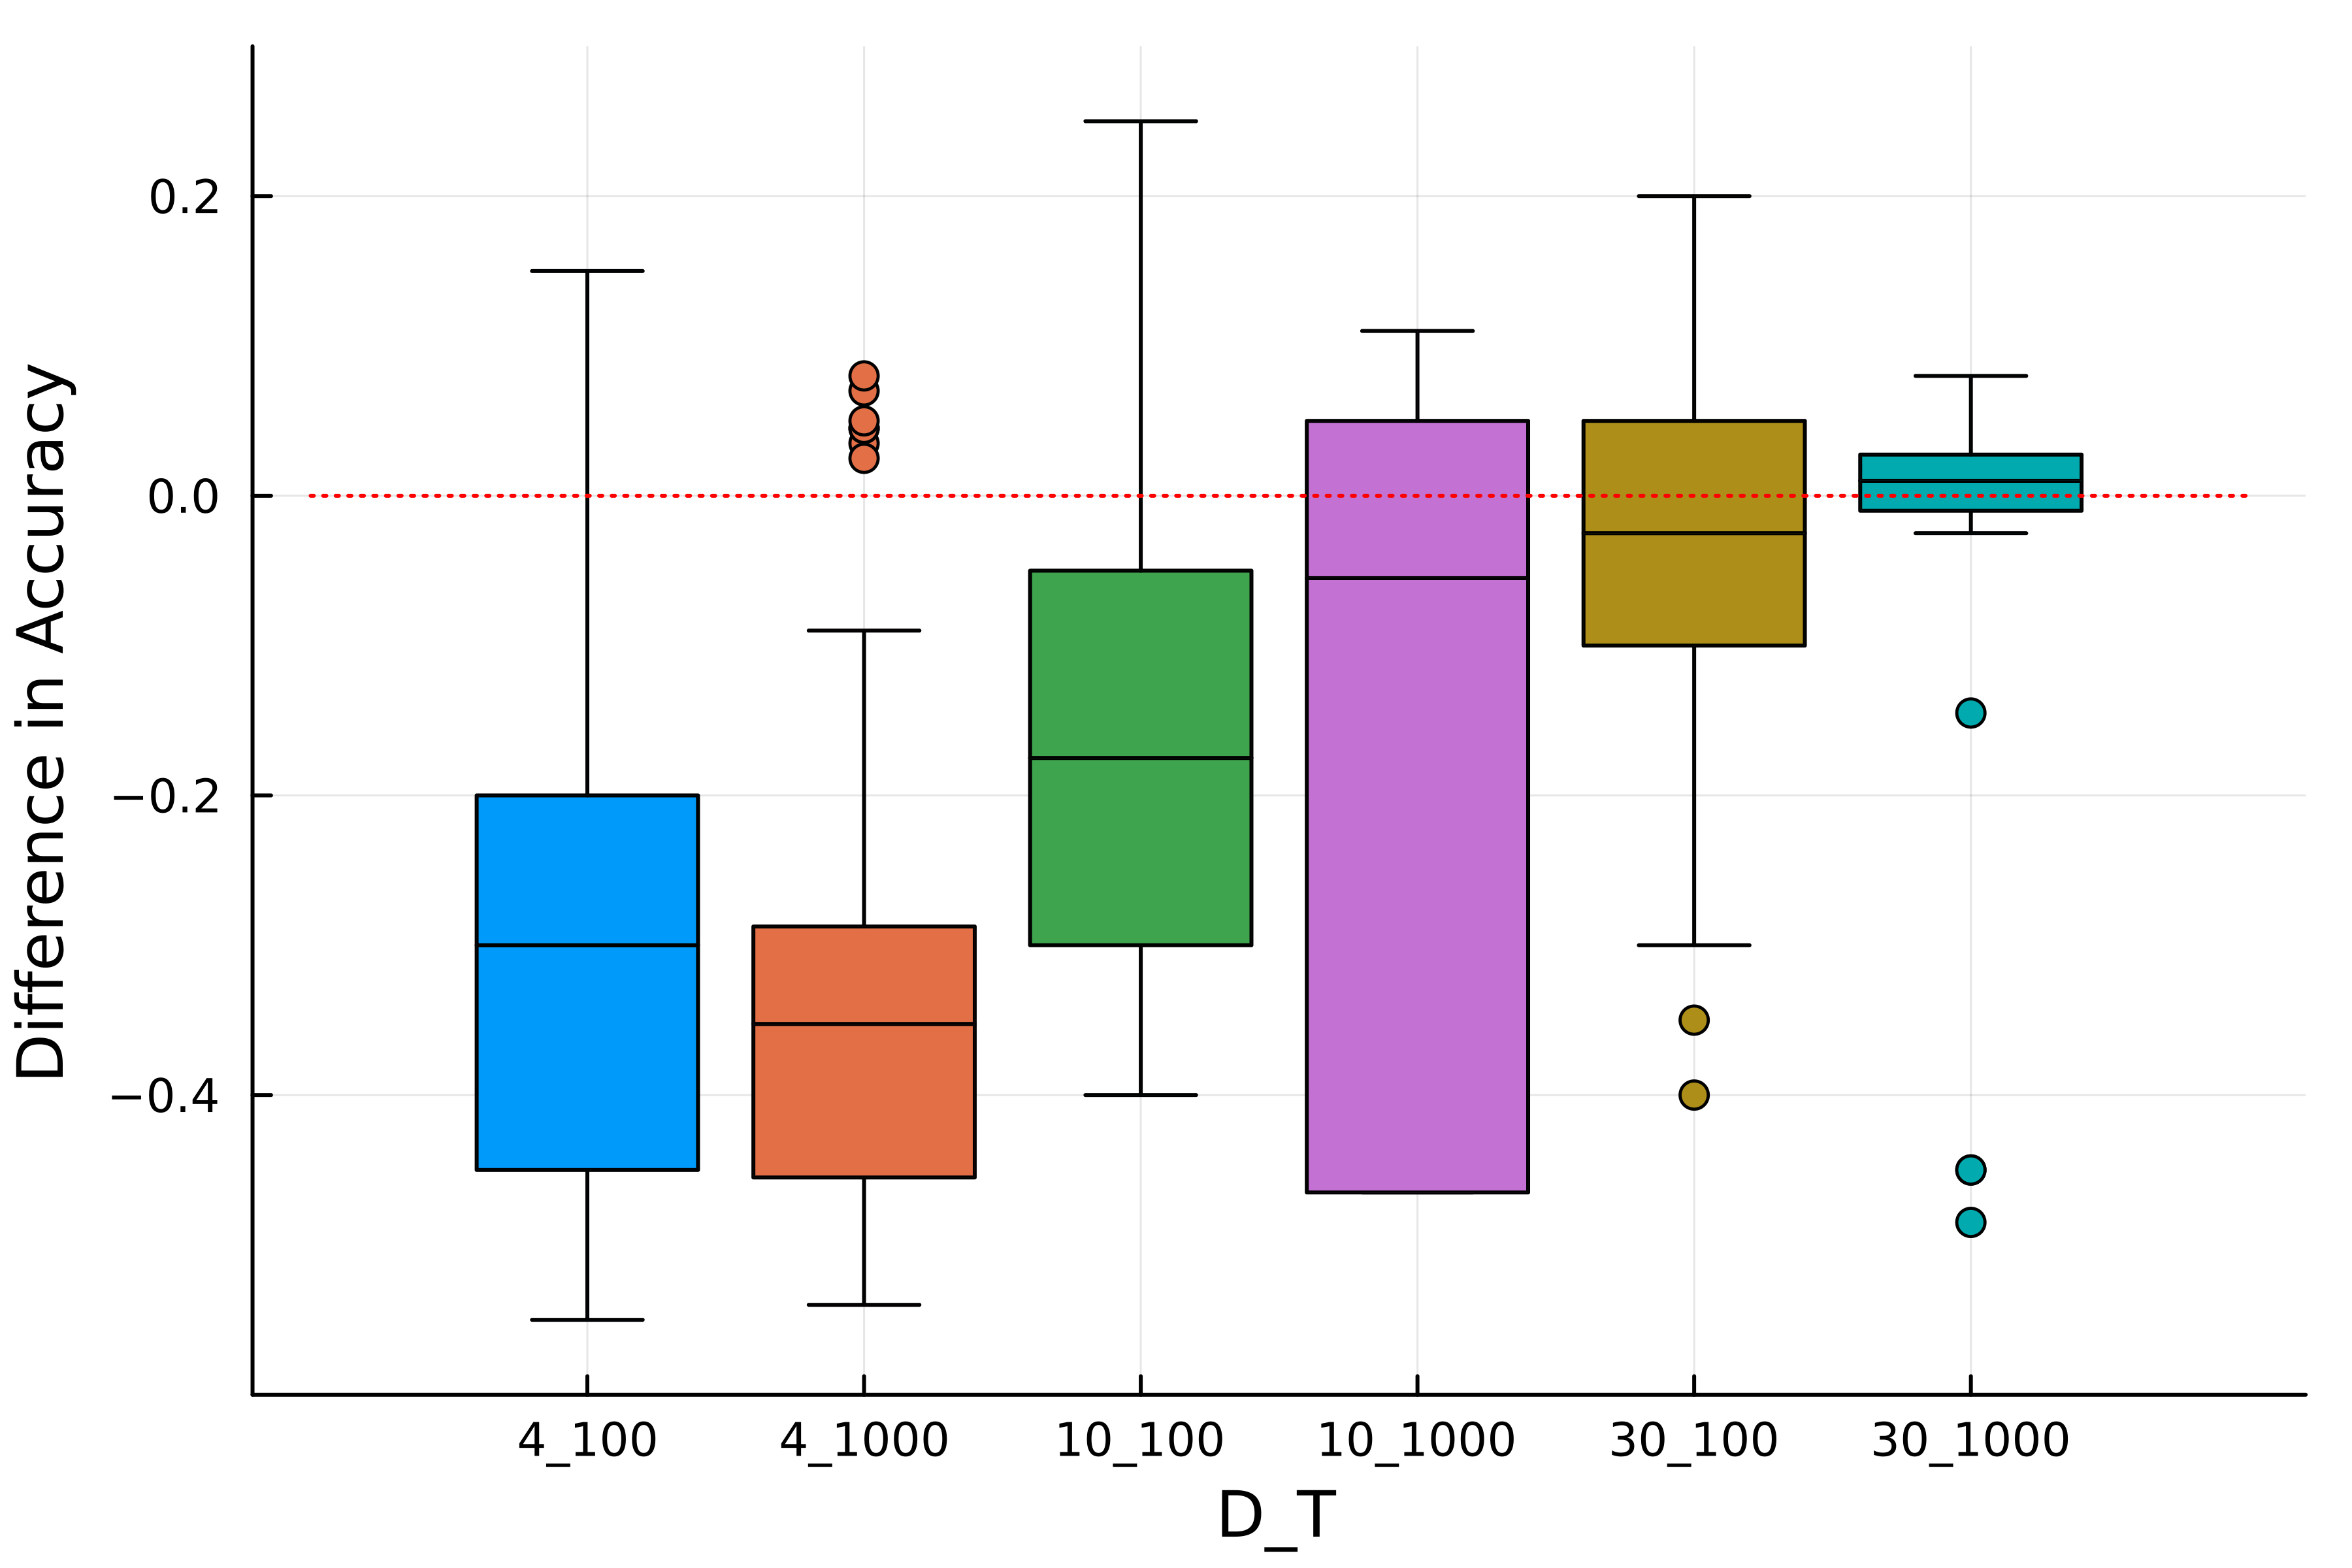

In [8]:
p = boxplot([x[1].-x[2] for x in [data[y] for y in k]],legend=false,xticks=(1:6,k),xlabel="D_T",ylabel="Difference in Accuracy",ylim=(-0.6,0.3),dpi=600)
plot!(0:7,zeros(8),color = :red,linestyle= :dot)
savefig(p,"plots/hybrid_diff_acc-png")
p

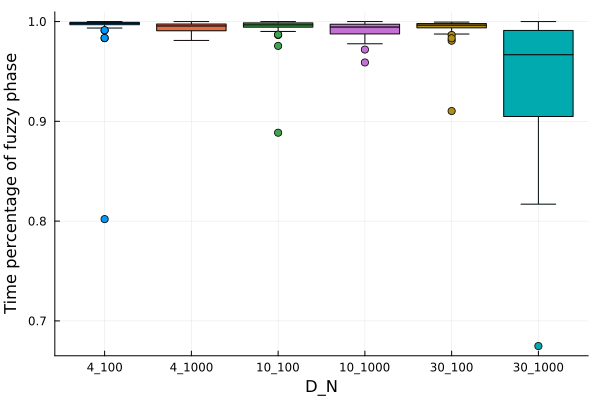

In [115]:
boxplot([x[4]./x[3] for x in [data[y] for y in k]],legend=false,xticks=(1:6,k),xlabel="D_N",ylabel="Time percentage of fuzzy phase")

In [117]:
perc = [x[4]./x[3] for x in [data[y] for y in k]]

6-element Vector{Vector{Float64}}:
 [0.8020118293264153, 0.9978980129206481, 0.9969342918095462, 0.9999531991764731, 0.9978873673616606, 0.9945725244369262, 0.9832884828147235, 0.9999776084063485, 0.999284559934155, 0.9974848200391403  …  0.9978110210645416, 0.9964396806926656, 0.9994077418549382, 0.9999831228588182, 0.9951942521612644, 0.9913407811733288, 0.9968397304210361, 0.9982812727023535, 0.997677614539782, 0.9979457156706913]
 [0.9933609839513492, 0.9975600648628152, 0.9987710010809888, 0.9884755176776812, 0.9960013612668857, 0.9886350262554715, 0.9810588973699609, 0.9995322559440184, 0.9952619273526246, 0.9955234395553975  …  0.992956520415695, 0.9918371004288791, 0.9961197754517678, 0.9992491305844124, 0.9978690693134511, 0.9995739210231058, 0.9919638920641073, 0.9966041540349531, 0.9956656076403045, 0.9966283671752757]
 [0.8885944556334551, 0.996757205679017, 0.9954615555958529, 0.9944541338881508, 0.9976794827118515, 0.9942356828978501, 0.9900534607564518, 0.986523745491917

In [120]:
[mean(e) for e in perc]

6-element Vector{Float64}:
 0.9932927886620558
 0.993988304998745
 0.9937475925049472
 0.9919572619623087
 0.9935604726969974
 0.9356304842390424

In [121]:
[std(e) for e in perc]

6-element Vector{Float64}:
 0.027821732055198646
 0.0050323868635015504
 0.0157607620893559
 0.008194221073231945
 0.012666176443055302
 0.07593051456484198

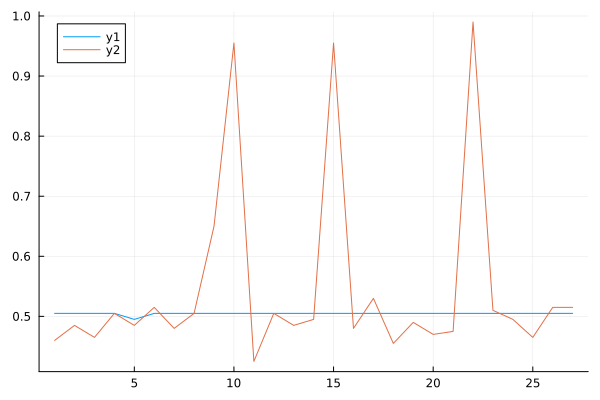

In [61]:
plot(acc)
plot!(acc_non_fuzzy)

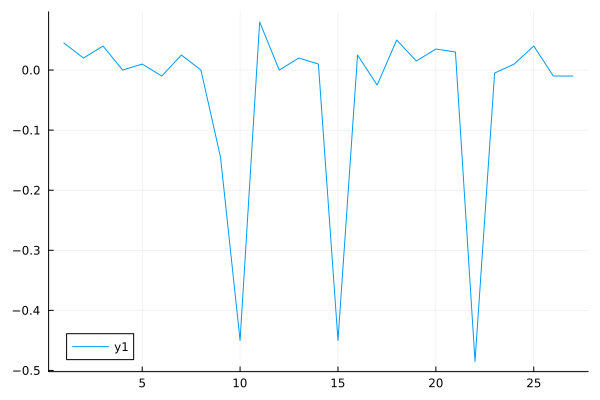

In [62]:
diff = acc .- acc_non_fuzzy
plot(diff)

In [63]:
mean(diff), std(diff)

(-0.04203703703703702, 0.1560711084191782)

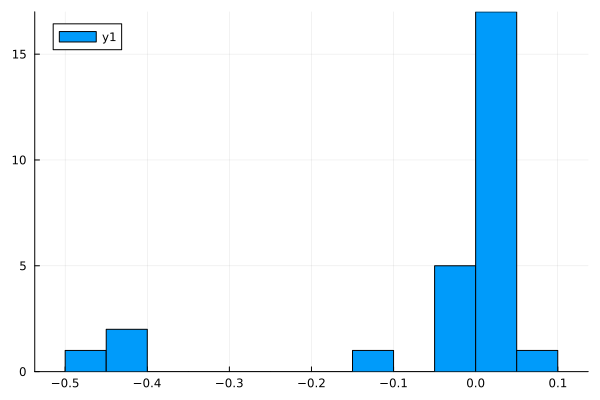

In [68]:
histogram(diff,bins=20)

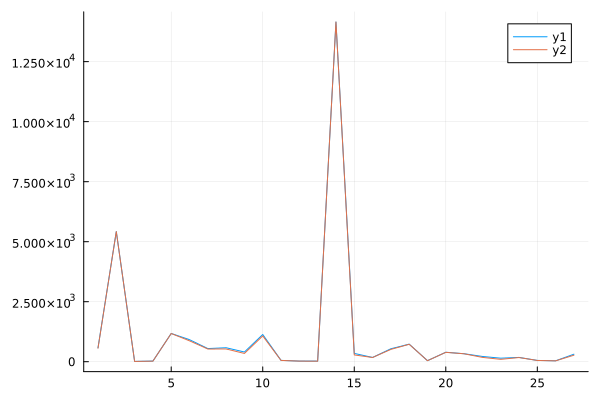

In [65]:
plot(complete_time)
plot!(fuzzy_time)

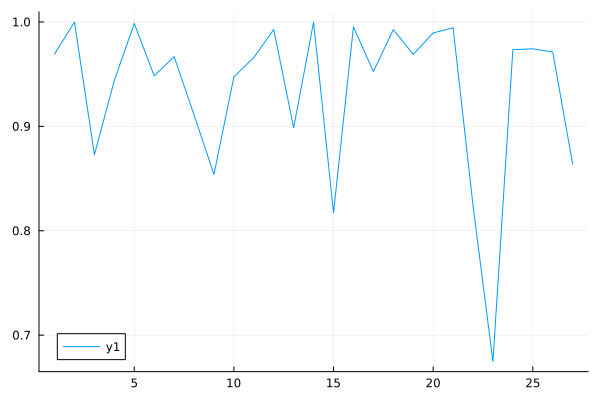

In [66]:
plot(fuzzy_time ./ complete_time)

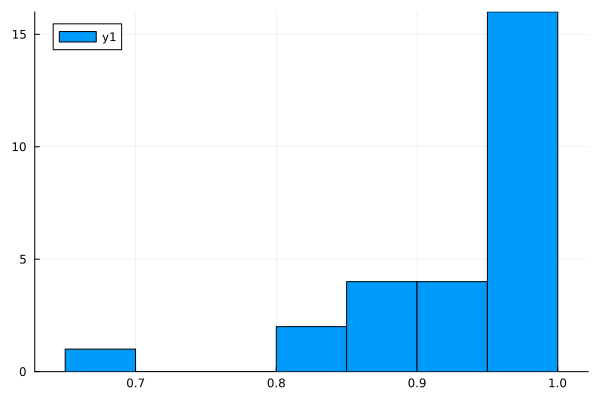

In [67]:
histogram(fuzzy_time ./ complete_time)